In [8]:
import os, sys
cur_path = os.path.abspath(os.path.dirname('__file__'))
basic_path = cur_path.replace('logisticRegression', 'basic')
sys.path.append(basic_path)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 < 1.5, dtype=int)

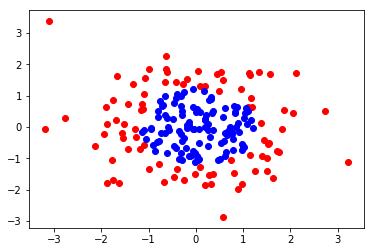

In [11]:
plt.scatter(X[y==0, 0], X[y==0,1], color='r')
plt.scatter(X[y==1, 0], X[y==1,1], color='b')
plt.show()

### 使用逻辑回归

In [14]:
from LogisticRegression import LogisticRegression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LinearRegression()

In [23]:
log_reg.score(X, y)

0.605

In [33]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[3], axis[2], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

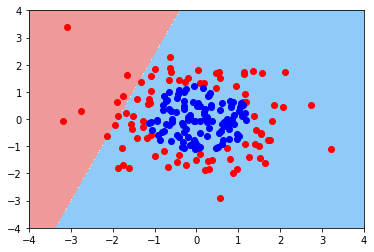

In [35]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0,1], color='r')
plt.scatter(X[y==1, 0], X[y==1,1], color='b')
plt.show()

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [40]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X, y)
poly_log_reg.score(X, y)

0.95

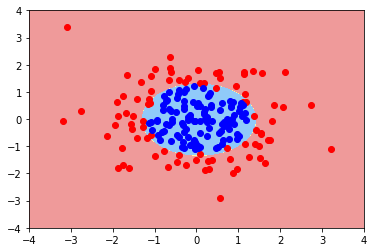

In [39]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0,1], color='r')
plt.scatter(X[y==1, 0], X[y==1,1], color='b')
plt.show()